<a href="https://colab.research.google.com/github/GabrielaGroenenewegenVanDerWeijden/Neuro-25/blob/main/%5Bsolutions%5D_DIY_Neuron_Model_Part_1_Interactive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To be able to edit and use this Notebook:

0. Learn about how to use google colaboratory [video](https://www.youtube.com/watch?v=inN8seMm7UI)
1. in the ```File``` menu (top left), click ```open in playground```
3. still in the ```File``` menu, click ```save copy in drive```, to make your own personalized and editable copy of this file. Alternatively you can ```open in playground mode```
4. edit as you like. If something breaks irreparably, either:
  1. restart the ```Runtime```
  2. or go back to step 1.


# Project 1: A DIY Neuron Model



### The Hodgkin Huxley Model:
The origin of the action potential was a mystery to early neuroscientists when Hodgkin and Huxley proposed their model in 1952. Aided by the voltage clamp technique, and the persuasion that they could model the physics of the neuron as an electrical circuit, they set out to understand the mechanism underlying the generation of the action potential. In their [concluding paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1392413/pdf/jphysiol01442-0106.pdf) in 1952, they formulated the mathematical framework most often used in computational neuroscience. Many fundamental building blocks in modelling excitable cells were laid down in this framework, which is of foundational importance to date.




<!-- ### Previous Project:
In the previous project, you have learned that:
- individual ions lead to individual **equilibrium potentials** or **Nernst** potential.
- when different ion concentrations exist inside and outside the cell, the cells settles in a ***resting potential***, which is given by the weighted average of the different conductances. -->

### In this Project:
You will synthetize the **Hodgkin Huxley model of action potential** piece by piece. We will be building understanding as we present the components of the model along with with some simulated experiments (using the 'brian2' simulator), sample code and simple coding exercises. We begin by describing the **passive properties** of the membrane (leak and capacitance) then introduce the **active** components and the **voltage gated** ion channels. In the second part of the project we will examine the completed Hodgkin Huxley model and conduct some experiements using the model.

Questions during the project are designed as self-evaluation (for you to test your own comprehension). If you have doubts about particular answers, ask your neighbor, your TA or your professor (in that order).

### The landmarks in the road map:

1. (Project 0) The electrical potential across membrane is due to differences in chemical concentration.
2. The membrane potential is altered by flux of ions across the membrane via ion channels.
3. Membrane permeability to different ions varies as a function of the membrane potential (active channels).
4. Positive feedback creates an accelerating rise of positive currents due to sodium channels.
5. High membrane potential actives potassium channels (a negative feedback).
6. Spikes are due to the different time scales of ion permeability.

# Key Terms


- **Permeability**. How easy it is for an ion to cross the membrane. Plastic is 'impermeable to water'. Expressed as a propotionality. It is proportional to the number of open channels on the membrane for an ion. Commonly expressed as relative permeability of the ion channels compared to one another.
- **Current, _I_**. A flow of electric charge. Measured in amperes ($\mathbf{A}$). Commonly seen also as a current density ($\mu A/cm^2$)
- **Capacitance, _C_**. How well a material can *store* charge. Measured in farads ($\mathbf{F}$).
- **Resistance, _R_**. A measure of the opposition to the flow of charge (current).  Measured in ohms ($\mathbf{Ω}$).
- **Conductance, _g_**. The reciprocal of resistance (1/R), measures how easily the electricity flows through parts of the circuit for a given difference in voltage. Is an electrical property and is influenced by permeability. It is measured in Siemens (‎$S‎ = Ω^{-1} $). It often appears as a density ($mS/cm^2$).
- **Ion Channels**. Pores through the membrane that allow for selective permeability of different ion types. There are 'active' and 'passive' ion channels. Active channels change their conductance as a function of, for example, membrane potential. The conductance of passive channels is constant.
- **Voltage Clamp**. A method that creates a constant potential difference across the membrane and measures the current flowing through it.
- **Activation Gates**. Variables that represent the proportion of channels in a certain state (open or closed).
- **Depolarization**. A positive change in the membrane voltage (cell becomes more positive).
- **Hyperpolarization**. A negative change in the membrane voltage (cell becomes more negative).



# Learning Objectives

After this project you'll be able to:

- Explain how **passive ion channels** and membrane properties lead to the **membrane time constant**.
- Explain what is the **driving force**.
- Differentiate between **active** and **passive** ion channels.
- Explain what is a **gating variable**.
- Compute the **steady state** of **voltage gating variables** in the voltage clamp.
- Explain the **current flows** across the cell as a function of **maximal conductances** and state of the gating variables.
- Explain **conductance** in your own words and why it is different for different ion types.
- Compute the **currents** entering the cell for different ion channels.
- **Assemble** the different ionic currents in the HH model to produce action potentials.
- Know the physical **units** of conductances (Siemens), current (Ampere) and membrane potential (Volts) relate to each other.

# Pre-requisites

Before you go through the project watch the videos suggested below. If you find a better video, you can contribute with the whole "computing brain" crowd by suggesting links to be uploaded to the [computing brain youtube channel](https://www.youtube.com/channel/UCU2BRdfg49st7ZdFMZbDScg)!


- How to measure neurons via clamps (current clamp, voltage clamp) [video](https://www.youtube.com/watch?v=mVbkSD5FHOw&t=4s)
- Ions and electrical charge (Ohm's law) : [video](https://www.youtube.com/watch?v=G3H5lKoWPpY) or [video](https://www.youtube.com/watch?v=fGI9d0CjI8s)
- Capacitance :  [video](https://youtu.be/f_MZNsEqyQw) or [video](https://www.youtube.com/watch?v=u-jigaMJT10)
- Basic understanding of the electrochemical gradient [video](https://www.youtube.com/watch?v=Ba02v7eoVWQ).
  

# Initialization Code

- In the code cell below we install the simulator [Brian2](https://brian2.readthedocs.io/) and import relevant python.modules.
- It installs and imports Brian2, the simulator we will be using.
- **Note that you have to run this every time that colab 'disconnects' from the kernel.**
- Documentation of brian2 can be found [here](https://brian2.readthedocs.io/en/stable/user/index.html)
- Many errors will be related to your units
- You can safely ignore Warning messages.
- If you don't know what to do anymore, restart the "Runtime" in colab.

In [1]:
# install brian2
!pip install brian2
!pip install ipympl

# import necesary packages
from IPython.display import display
from brian2 import * # our simulator of choice
import brian2.numpy_ as np # the numpy that comes bundled with it
from ipywidgets import interact, interactive, VBox, HBox, Label # for some neat interactions
from IPython.display import display
import ipywidgets as widgets
import matplotlib.pyplot as plt # for neat plots
import time # for time basis conversions
from google.colab import output
output.enable_custom_widget_manager()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.7/515.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.6 MB/s eta 0:00:00


# 1. The Passive Membrane

## Differences of Potential Due to Differences in Ion Concentration

As we learned in the previous project, fatty membrane separating the outside and the inside. Insert some  negatively charged ions and molecules inside (such as Chloride or other anionic proteins). If this compartment is placed in a more positively charged environment, there's a negative difference of potential across the membrane.

**The membrane is not perfectly permeable**. There are ion channels in the membrane through which ions can cross. Nature likes an equilibrium, and in principle ions would flow out of the membrane until charge balance is achieved.  However, some ions are too large to get across the membrane, thus they get stuck inside, keeping that charge in the cell. Many proteins inside the cell fit that description, and that makes it so that the inside of the cell is negatively charged. How negative? That's a function of how much charge per volume (charge density) there is. The thing to remember is that even if all channels in the membrane are open, the cell would still retain considerable negative charge.

The smaller the ion, the more charge can be packed in a volume. Also, in general there are more ions than ion channels, and so it takes time until these ions can find a channel to leak through, until it comes back to the resting membrane potential.

We can calculate this rate of decay via the **passive properties** of the membrane, the **capacitance** and the **leak conductance**.


### The Driving Force


The same way as a ball on a hill has potential energy proportional to the height of the hill, the passive membrane that is taken away from $V_{rest}$ has a potential called the **driving force**.


---


$$V - V_{rest}$$


---


The farther from $V_{rest}$, the higher the potential, and the willingness of the potential to return to its equilibrium state (usually between -50 to -70mV). Take note of the sign change for when V is smaller than or larger than V_rest. This means that the force *changes direction* depending on the membrane potential of the cell. Note that the driving force pulls the neurons toward their equilibrium potential.

Two parameters determine the rate with which the membrane returns to the resting potential, the **membrane capacitance** ($C_{membrane}$, measured in Farads) and the **leak resistance** ($R_{leak}$, measured in Ohms. Note that we also write $g_{leak} = 1/R_{leak}$ where $g_{leak}$ is conductance, measured in Siemens).

While the leak resistance relates to the number of pores for ions to cross (only those that are permeable), capacitance is equivalent to the amount of charge that the cell membrane can store and is relatively constant for most cells.

### Charge Loss Due to Leak Conductance and Capacitance



  When ions cross the membrane through pores (ion channels) we speak of a **current leak**. The **leak conductance** is a measure of how permeable the membrane is to ions, or, in other words, the number of **passive ion channels** and how many ions can cross over time (recall that charge flow is current).

The membrane potential change per unit time is represented by ($\frac{dV}{dt}$), or equivalently $\dot{V}$, and is an ordinary differential equation. In the absence of any other influences, $V$ tends to $V_{rest}$ (in millivolts (mV)), with a rate determined by the **leak conductance** ($g_{leak}$), which is a constant value, and therefore a **"passive conductance"**. Conductance is a measure of the number of leak channels available for the crossing of ions.

---


$$ \dot V = - \frac{1}{R_{leak}}(V-V_{rest}) $$

is the same as

$$ \Leftrightarrow \dot{V} = - g_{leak}(V-V_{rest})$$

---


Through passive ion channels, the charge leaks out of the neuron until the electrochemical equilibrium, i.e., the resting potential is reached. That is, the driving force gets smaller and smaller until zero. The conductance determines the rate of the return to equilbrium (resting potential).

The negative sign explains that the direction of potential change is opposite to the driving force. That is, if we have a net positive driving force, we have a negative rate of change.


Furthermore, cell membranes have [**capacitance**](https://www.youtube.com/watch?v=G3H5lKoWPpY), which is a measurement of how much charge it can store (review the video on capacitance in pre-requisites). The thicker a membrane, the lower the membrane capacitance $C_m$. **The capacitance dampens a current flow**, reducing the rate of change of the membrane potential. The lower the capacitance, the faster the potential difference comes to the resting potential.

---
From charge conservation considerations we know that if the total current flowing through the circuit is equal to the sum of the capacitive and the resistive currents.

$$I_{injected} = I_c + I_{leak}$$

If there is no net current ($I_{injected} = 0$), the capacitive current flowing in the cell is equal to the leak current, with an inverted sign.

$$0 = I_c + I_{leak}$$
$$I_c = - I_{leak}$$

If we spell out the currents , we have that:

$$C_{m} \dot{V}  =  I_{injected} - g_{leak}(V-V_{rest}) $$

and therefore:

$$\dot{V} =  \frac{I_{injected} - g_{leak}(V-V_{rest})}{C_{m} }$$


or by using leak resistance instead of conductance,


$$\dot{V} =  \frac{I_{injected}}{C_{m}} - \frac{(V-V_{rest})}{R_{leak} C_{m} }$$

---

The denominator of the second equation $R_{leak}C_m$ is often substituted by $\tau_m$, the so called **time constant** for reasons that will become clear below.

Notice also that injected current creates voltage deflections with the same sign, whereas the leak induces a negative rate (i.e., returning to rest).


## Interactive: Visualizing the Time Constant via Current Injection into the Passive Membrane

How fast do we get to the resting membrane potential if we only have passive elements in the membrane (leak ion channels and capacitance)?

To see how capacitance and resistance influence the passive decay time of the membrane potential back to resting potential, we create a live widget where we can give a voltage step ('clamp') and see how changes of $C_m$ and $g_{leak}$ change the slope of the decay.

**In the code below, pay particular attention to the equation being computed.**

In [4]:
#for interactive plotting
%matplotlib inline

In [5]:
# Drawing function to update the plot
def draw(line, data):
    line.set_ydata(data)    # update line
    ax = line.axes          # get back ax and fig from line
    figure = ax.figure
    ax.relim()              # relim and redraw
    ax.autoscale_view()
    figure.canvas.draw_idle()

# Update function to call the passive membrane function and draw the result
def functionUpdate(line, function, i=widgets.fixed(0), **params):
    res = function(**params)
    if (isinstance(res, tuple)):
      data = res[i]
    else:
      data = res
    draw(line, data)

In [ ]:
# Passive membrane function definition
def PassiveMembrane(C_m, g_leak, I):
    start_scope()

    E_leak = -54.5 * mV
    dtt = 0.025 * ms
    g_leak = g_leak * mS/cm**2
    C_m = C_m * uF/cm**2

    eqs = '''
    I_leak = g_leak * (v - E_leak) : ampere * meter**-2
    dv/dt = (I - I_leak) / C_m : volt
    I : ampere * meter**-2
    '''

    passive_membrane = NeuronGroup(1, eqs, method='euler')
    M = StateMonitor(passive_membrane, ['v', 'I'], record=0)
    passive_membrane.v = E_leak

    run(50 * ms)
    passive_membrane.I = I * mA/cm**2
    run(50 * ms)
    passive_membrane.I = 0 * mA/cm**2
    run(50 * ms)

    output = M.v[0] / mV
    return output

In [ ]:
# Close all open plots (optional)
plt.clf()
plt.close('all')

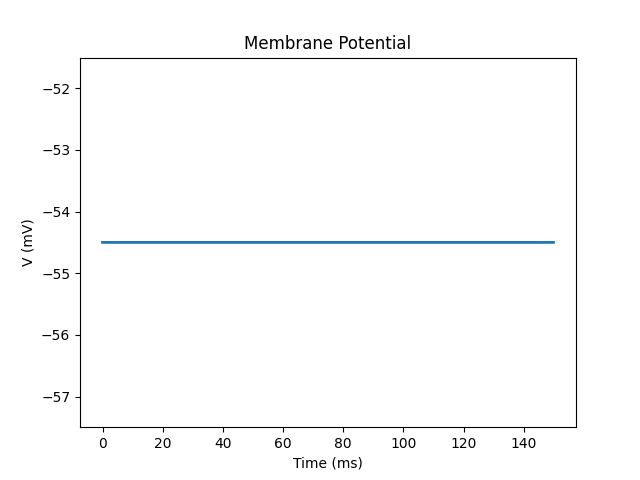

In [ ]:
# Initial Plot (change name!) ensure existing plot is cleared
plotname="potential"
plt.close(plotname)

t = np.arange(0, 150, 0.1)
V = np.zeros(1500) -54.5

fig, ax = plt.subplots(num=plotname)

line, = ax.plot(t, V, lw=2)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('V (mV)')
ax.set_title('Membrane Potential')
plt.show()


In [ ]:
#@title Interactive
# Widgets for interactive parameters
line=widgets.fixed(line)
function=widgets.fixed(PassiveMembrane)
params = {
    "g_leak": widgets.FloatSlider(min=0, max=1, step=0.1, value=0.5, continuous_update=False),
    "C_m": widgets.FloatSlider(min=0.1, max=10, step=0.1, value=5, continuous_update=False),
    "I": widgets.FloatSlider(min=-1, max=1, step=0.1, value=0, continuous_update=False)
}

# Interactive
w = interactive(functionUpdate,
                line=line,
                function=function,
                **params
                )
display(w)

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='g_leak', max=1.0), FloatSli…

## Questions:

0. Describe to yourself what you see in the plot above. Relate that to the code.

1. A current pulse is injected into the membrane. What is its duration? What is its unit?

1. What is the **time scale** of the decay due to passive properties of the membrane?

2. What is the influence of capacitance on decay time to resting potential? What is the influence on voltage rise time?

3. What is the relationship between leak conductance and capacitance on decay dynamics?

4. What is the **Driving Force**? What direction does it point towards?

5. What is the difference in maximum evoked potential as you change leak conductance? What if leak is set to zero?

### Answers:


0. A simulation of the response of the passive membrane for a current injection, depending on the resistance and capacitance of the membrane.
1. A passive membrane has a resting potential of -70mV. At about 50ms, it is momentarily 'clamped' to a higher voltage (-45mV). After release of the holding potential, the membrane potential returns to resting value.

2. Judging by the time for the voltage to decay to baseline in the plots above, the time scale of the decay is about 10's of milliseconds.

3. The larger the capacitance, the slower the decay. This makes sense, as capacitance is a measure of 'charge storage capacity'.

4. They are reciprocal of each other.

5. The Driving force is (Vpulse - Vleak). Positive if Vpulse is larger than Vleak. The direction is then the opposite of the voltage deflection.

6. Leak determines the maximum potential during current injection. Larger leak means less accumulated charge, does smaller potential. After the step, the membrane potential no longer changes, because current is not leaking passively through the leak channels. The entire charge delivered by the current is kept.

## Units of Conductance: mS or mS/cm^2?


**The base unit of conductance** is the $S$, the *Siemens*, the reciprocal of resistance, given in *Ohm* ($\Omega^{-1} = S$). The leak **conductance** reflects the number of leak channels in the membrane (i.e., pores).

A single ion channel, will have a certain conductance (called 'unitary' conductance, because it is a single ion channel). The membrane has many of these channels per unit area, so when describing the channel conductance of the neuronal membrane we often use 'density'. The ion channel conductances per unit of membrane area is often given as milisiemens per centimeter square ($mS/cm^2$).

In this project we use *conductance density* and also *current density* (often in $mA/cm^2$). Other models can use *total conductance* for the entire cell, or *total current injected* in which case we are effectively multiplying a density times a membrane area. While the later value is largely invariant to cell size, the former choice is very dependent on the cell's surface area. Therefore, when we measure conductance in experiment we often prefer to use express conductances as densities.

While this may seem like a digression, a *modeler has to be very aware of his choices for units* because cell dynamics are very sensitive to values. This is also the reason why we selected Brian as our neural simulator, as it forces us to make unit choices explicit.

Henceforth, every time you see a value, stare at the unit for a moment and try to visualize what it is measuring. Attend to scales!

# 2. The Excitable Membrane

### Active Ion Channels


**Active Channels are those where conductance (ion permeability) changes as a function of something, usually voltage** or some chemical. In contrast, passive channels such as the **leak** have constant conductance. Active essentially means that the state of the channels changes as a function of some other variable, such as the membrane potential.

Ion channels come in grate variety depending on ion selectivity, whether their activation is voltage dependent, or on whether they depend on binding to a particular chemical (ligand gated channels).

We begin our exposition with active (but simple) ion channels whose activity is dependent on the membrane potential.


### Ion Selectivity

Channels can be more or less **selective** for particular ions, and we generally name the current that is due to a certain ion channel with the name of it's preferred ion. For example, Sodium ions go through the **Sodium channel** and become the **Sodium Current**.

Other channel types exist that are less selective, and have currents  due to multiple kinds of ions, with prominent examples being the Sodium/Potassium pump and the **NMDA** receptor, which exchanges both Calcium and Magnesium. There are also Chloride channels and many others. We focus on the ones that are crucial for the production of action potentials.

### Currents

The current that crosses the membrane is a function of the number of permeable ion channels available at the membrane at a given time. For example, **the Sodium current ($I_{Na}$) is the total amount of current that is due to the flow of Sodium ions through the sodium channels**. The current is determined by the multiplication between the **maximum conductance**, the **gating variables** representing the proportion of open ($m$) and active ($h$) chanels and the **driving force** ($V-V_{rest}$).


The following paragraphs define **gating variables**, their effect on permeability and how they change over time, i.e., their **dynamics**.

> For an explanation on the dynamics of single channels opening and closing [see this video about single channel recordings](https://youtu.be/lpkaXwtAt7E).

### Gating Variables



Installed in the membrane are large numbers of active ion channels (varying from tens to tens of thousands). Many ion channels are rather selective. Ion channels can be open or closed state. The ion channels are statistically independent of each other.

From these assumptions, we can represent the state of active ion channels via **gating variables, which represent the proportion of channels that are open or closed** (or sometimes 'activated and inactivated'). As they are a **proportion** of open channels of all available channels, they take values from 0 (no channels opened) to 1 (all channels opened).

(If we have 100,000 channels, and 80,000 are currently open, then gating variable $x$ has value 0.8, that is 80% of the channels are open).

Each channel opens and closes probabilistically and independently ([see explanation on [single channel patch clamp](our video). The probability of opening and closing is a function of the context, which could be, for example, the momentary membrane potential of the cell. When there are large numbers of channels, this probability of the single channel can be taken as the proportion of channels open. For example, for a given membrane potential $V$, the **proportion of  channels in an open state** is given by a function of activation gate $m_{\infty}$ (a **gating variable**):

<img src="https://i.postimg.cc/h4TDpRN2/m-inf.png" width="350x">

In this figure we have the experimentally measured proportion of open channels, i.e., the *steady state* of the **gating variable** (the error bars represent the outcoume of multiple experiments).

#### Quiz Questions:

1. Analyze the graph above and determine what is the potential at which all channels are closed?
1. What is the difference between an active and a passive ion channel?
1. What is a gating variable?
1. What is selectivity?

### Activation and Inactivation Gates



**Note** that there can be more than one gating variable per channel type, depending on the mechanisms of the ion channel. For example, the Sodium ion channel has two gates, the **activation gate** $m$ and the **inactivation gate** $h$. A function that determines the activation gate is called an activation function.

The flow of sodium through all channels (permeability)  is dependent on both these gating variables. As m and h represent proportion, they can also be thought of as probabilities. Hence, the probability of an ion channel being permeable is their multiplication.

----

$$p = m^a h^b$$

----

The exponents $a$ and $b$ are also related to the mechanical action of the ion channel, essentially expressing the number of  activation gates (a) and inactivation gates (b) (for a more in-depth explanation consult chapter 2 of Dynamical Systems in neuroscience, or Aaron).

### Sample Code: Plotting a function with python

An arbitrary **activation function** $x$ takes from 0 to 1 as a function of V. It is commonly represented by a  [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) such as the one below. The sigmoid is chosen because it is a function that is bounded, symmetric and smooth.

---

$$x_{\infty}(V) = \frac{1}{1+e^{(V_{1/2}-V)/k}}$$

---
This type of function is often used to model the **steady state** (represented by the $\infty$ subscript) of the activation gate, because it is symmetrical, rises smoothly and can be parameterized to match experimental data.

The function takes two parameters, $V_{1/2}$ and $k$ ($V_{1/2}$ defines the position of the midpoint of the sigmoid, and k defines the slope, see figure). These parameters are obtained experimentally via patch clamp experiments. For example, the activation variable $m_{\infty}$ of the squid axon, we have that $V_{1/2} = -40, k = 15$.


The parameters determine the shape of the sigmoid function, as such:

[![boltzmann-function.png](https://i.postimg.cc/Tw2b5MsG/boltzmann-function.png)](https://postimg.cc/R38h289b)

The python code below defines and plots a mathematical function, in this case, the sigmoid (also called a Boltzmann function).



In [ ]:
# define a function m_inf that returns the steady state of m gate for any value of the potential V.
def sigmoid(v_at_half, k, V):

    #np.exp means we are using the function exp from the package numpy
    return (1./(1.+np.exp((v_at_half-V)/k)))

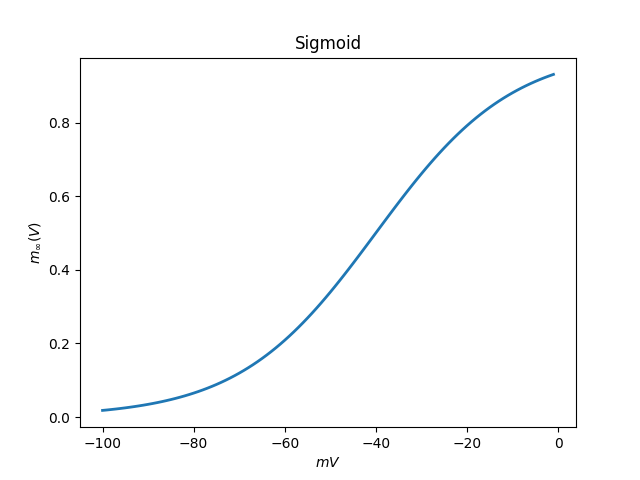

In [ ]:
# Initial Plot (change name!)
plotname="sigmoid"
plt.close(plotname)

# define initial plot variables
v = np.arange(-100.0, 0.0, 1.) # from -100 to 0mV at steps of 1mV
m_inf = sigmoid(-40,15, v)

# make Figure
fig, ax = plt.subplots(num=plotname)
line, = ax.plot(v, m_inf, lw=2)
ax.set_xlabel(r'$mV$')
ax.set_ylabel(r'$m_{\infty}(V)$')
ax.set_title('Sigmoid')
plt.show()

In [ ]:
#@title Interactive
# Widgets for interactive parameters
line=widgets.fixed(line)
function=widgets.fixed(sigmoid)
params = {
    "v_at_half": widgets.FloatSlider(min=-100, max=0, step=1, value=-40, continuous_update=False),
    "k": widgets.FloatSlider(min=1, max=30, step=1, value=15, continuous_update=False),
    "V": widgets.fixed(v)
}


# Interactive
w = interactive(functionUpdate,
                line=line,
                function=function,
                **params
                )
display(w)

interactive(children=(FloatSlider(value=-40.0, continuous_update=False, description='v_at_half', max=0.0, min=…

##### Quiz Question:

- Why does a sigmoid shape is well suited to represent gating variables?


### Activation Time Constants

When the membrane potential changes, the opening and closing of channels **is not instantaneous**. The gating variable tends to the steady state that is dependent on  voltage (see plot under gating variables) with a rate inversely proportional to $\tau_x$, which is also voltage dependent. In other words, to determine this rate of change (from open to close or vice-versa) we can measure $\tau_x$.
Note that $\tau_x$ is the time constant for the rate of change of gating variables and is different from the membrane time constant.

![tau-m.png](https://i.postimg.cc/FFZq9PS9/tau-m.png)

The function that determines the rate of change of m is given by

---

$\tau_x(V) = C_{base} + C_{amp}  e^\frac{-(V_{max}-V)^2}{\sigma^2}$

---


#### Code Exercise: Plot the function for $\tau_m(V)$

Using the sample code above, plot the function defined above.

Where $C_{base}, C_{amp}, V_{max}, \sigma$ are given parameters (see below).

[![gaussian.png](https://i.postimg.cc/XJFf9SKz/gaussian.png)](https://postimg.cc/JDrHWF2N)

### Your Code

In [ ]:
# define a function m_inf that returns the steady state of m gate for any value of the potential V.
def tau(C_base, C_amp, V_max, sig, v):
    #np.exp means we are using the function exp from the package numpy
    return C_base +C_amp*np.exp(-(V_max-v)**2/sig**2)

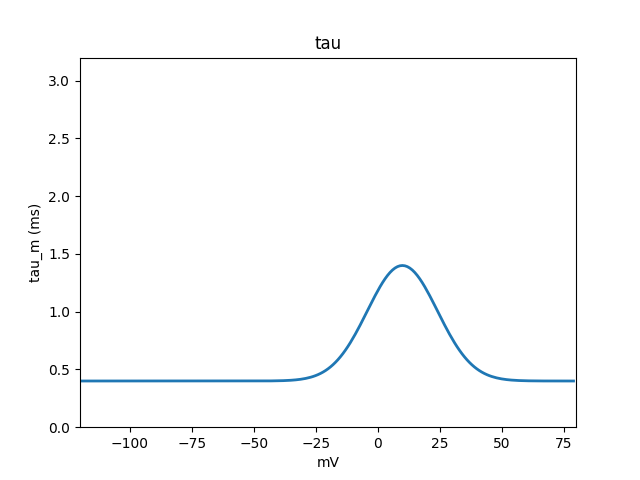

In [ ]:
# Initial Plot (change name!)
plotname="tau"
plt.close(plotname)

# define a voltage range for calculating the function
v = np.arange(-120.0, 80, 1) # from -100 to 0mV at steps of 1mV
tau1 = tau(0.4, 1, 10, 20, v)

# make Figure
fig, ax = plt.subplots(num=plotname)
line, = ax.plot(v, tau1, lw=2)
ax.set_xlabel('mV')
ax.set_ylabel('tau_m (ms)')
ax.set_xlim(-120.0, 80.0)
ax.set_ylim(0, 3.2)
ax.set_title('tau')
plt.show()

In [ ]:
#@title Interactive
# Widgets for interactive parameters
line=widgets.fixed(line)
function=widgets.fixed(tau)

# note: we have to use the FloatSlider widget for continuous variables, with continuous_update=False for improved performance
params = {
    "C_base": widgets.FloatSlider(min=0, max=1.6, step=0.1, value=0.4, continuous_update=False),
    "C_amp": widgets.FloatSlider(min=0, max=1.6, step=0.1, value=1, continuous_update=False),
    "V_max": widgets.FloatSlider(min=-120, max=80, step=1, value=10, continuous_update=False),
    "sig": widgets.FloatSlider(min=0, max=100, step=1, value=20, continuous_update=False),
    "v": widgets.fixed(v)
}


# Interactive
w = interactive(functionUpdate,
                line=line,
                function=function,
                **params
                )
display(w)

interactive(children=(FloatSlider(value=0.4, continuous_update=False, description='C_base', max=1.6), FloatSli…

### Maximal conductance ($\bar{g}$)


While the gating variable stands for the proportion of channels open, the **maximum conductance** $\bar{g}_{some\ channel}$ represents the total number of channels available of a given type. We read $\bar{g}$ as 'g bar'. As the channels can be in different states, the actual conductance is a product of the gating variable and of the maximum conductance.

---
$$g_{channel} = \bar{g}_{channel} x$$

---


Where x is the activation gate, that indicates the proportion of channels letting ions through.

Active ion channels change their conductance as a function of other variables, such as the momentary membrane potential. For the sodium ion channel for example, conductance is low when the cell is negative and high when the cell is depolarized.



### Conductance of the Sodium Ion Channel

Now that you have a better grasp of channel dynamics (i.e., tau), we can write the  conductance of sodium ion as a function of its activation and inactivation gates m and h:

$$
g_{Na}=\bar{g}_{Na}m^3h
$$

Where $\bar{g}_{Na}$ is the maxiumum conductance, $m$ is an activation gate, and $h$ is an inactivation gate. Essentially, if all channels are open $(m=1)$ and de-inactivated $(h=1)$, we have that the conductance is maximal ($=\bar{g}_{Na}$), so currents in and out of the cell are also maximized.


The variables in this equation can be interpreted. *m* is the probability of the activation gate to be open,  *h* is the probability of the inactivation gate to be 'de-inactivated', that is 'available'. Their powers, $a=3$ and $b=1$, respectively are the degrees of freedom of (in)activation gates in the Sodium channel. This figure represents the situation for the Sodium channel:

[![sodium-channel.png](https://i.postimg.cc/Gh7HXSR9/sodium-channel.png)](https://postimg.cc/cr3xHhrN)


### General model for conductances based currents:

The vast majority of voltage-gated ion channel are modeled similarly (like potassium for example, see below). In general, the activation and inactivation variables ( $m$ and $h$) are raised to powers $a$ and $b$ respectively. The exponents appear through fitting procedures, but can be taken to mean the "degrees of freedom" of the channel (how many distinct conformations that make the channel permeable).

$$
g_i = \bar{g_i} m^a h^b
$$


#### Understanding Differences:
- What is the difference between the membrane time constant and the time constant for the ion channel gating variables?
- How do inactivated channels differ from closed channels?


### Dynamics of Sodium gating variables

Gating variables in general take values from 0 (impermeable) to 1 (permeable). Changes in the membrane potential lead to changes in the proportion of channels open or inactivated.


- partially activated $(0<m<1)$
- completely activated $(m=1)$
- deactivated $(m=0)$
- inactivated $(h=0)$
- deinactivated$(h=1)$

The change in state (for m or h) is given by a differential equation that is a function of $V$. Note that it is very similar to the one for the dynamics of the membrane potential of passive membranes.

---

$$
\dot m = dm/dt = \frac{m_\infty(V) - m}{\tau_m(V)}
$$

---

where $m_{\infty}$ is the steady state  activation or inactivation (the equilibrium) and $\tau(V)$ is the activation or inactivation time constant (a measure of the time to reach a steady state, or the speed).

Think of $m_\infty$ as the value that is inevitably obtained as we hold the membrane potential fixed for a very long times (i.e., infinity).

$h$ is described by an equivalent equation:

---

$$
\dot h = dh/dt =  \frac{h_\infty(V) - h}{\tau_h(V)}
$$

---




#### Exercises:

1. Below you encounter parameters for the steady state and time constant of the different ion channel gating functions. These are the specific parameters according to Hodgkin and Huxley for the squid axon. Plot the steady state activation functions and time constants for each of the ions!


| gating function | $V_{\frac{1}{2}}$ | k | time constant ($\tau_{gate}$) | $V_{max}$ | $\sigma$ | $C_{base}$ | $C_{amp}$ |
|-|-|-|-|-|-|-|-|
| $m_\infty(V)$ | -40 | 9 |$\tau_m(V)$|-38     |30| 0.04 |0.46|
| $h_\infty(V)$ | -62 | -7 |$\tau_h(V)$| -67   |20| 1.2  |7.4|

<!-- | $n_\infty(V)$ | -53 | 15 |$\tau_n(V)$|-79 |50|1.1  |4.7| -->

**Important Note**: Hodgkin and Huxley in their original paper summed +65mV to the variables, so that the so that their resting potential would appear to be at 0mV. Here we use the value for the actual reversal potential of about -65mV.

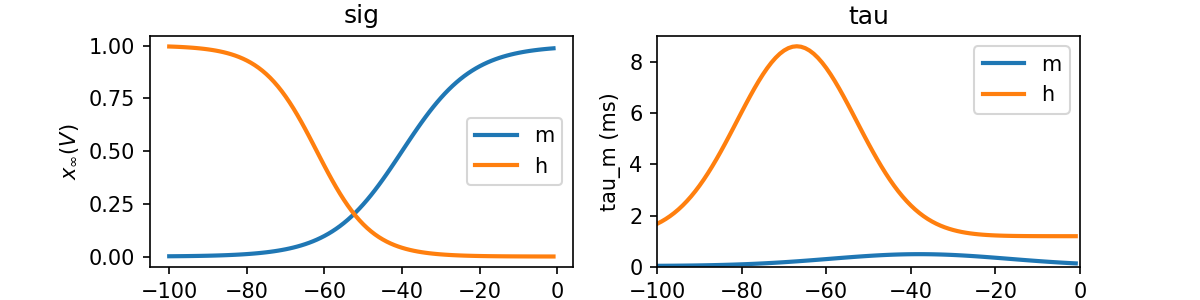

In [ ]:
# Initial Plot (change name!)
plotname="tau_sig"
plt.close(plotname)

# define a voltage range for calculating the function
V_range = np.arange(-100.0, 0.0, 1.)

m_inf = sigmoid(-40, 9, V_range)
h_inf = sigmoid(-62, -7, V_range)

tau_m = tau(0.04, 0.46, -38, 30, V_range)
tau_h = tau(1.2, 7.4, -67, 20, V_range)

# make Figure
fig, (ax1, ax2) = plt.subplots(1, 2, num=plotname, figsize=(8, 2), dpi= 150)
line1, = ax1.plot(V_range, m_inf, lw=2, label= 'm')
line2, = ax1.plot(V_range, h_inf, lw=2, label= 'h')
ax1.set_xlabel('$V $ (mV)')
ax1.set_ylabel('$x_{\infty}(V)$')
ax1.set_title('sig')
ax1.legend()

line3, = ax2.plot(V_range, tau_m, lw=2, label= 'm')
line4, = ax2.plot(V_range, tau_h, lw=2, label= 'h')
ax2.set_xlabel('mV')
ax2.set_ylabel('tau_m (ms)')
ax2.set_title('tau')
ax2.set_xlim(-100.0, 0.0)
ax2.set_ylim(0, 9)
ax2.legend()
plt.show()

In [ ]:
#@title Interactive

# Widgets for interactive parameters
u_line1=widgets.fixed(line1)
u_line2=widgets.fixed(line2)
function1=widgets.fixed(sigmoid)

u_line3=widgets.fixed(line3)
u_line4=widgets.fixed(line4)
function2=widgets.fixed(tau)

# note: we have to use the FloatSlider widget for continuous variables, with continuous_update=False for improved performance

params_sig1 = {
    "v_at_half": widgets.FloatSlider(min=-100, max=0, step=1, value=-40, continuous_update=False),
    "k": widgets.FloatSlider(min=1, max=10, step=1, value=9, continuous_update=False),
    "V": widgets.fixed(V_range)
}

params_sig2 = {
    "v_at_half": widgets.FloatSlider(min=-100, max=0, step=1, value=-62, continuous_update=False),
    "k": widgets.FloatSlider(min=-10, max=-1, step=1, value=-7, continuous_update=False),
    "V": widgets.fixed(V_range)
}


params_tau1 = {
    "C_base": widgets.FloatSlider(min=0, max=1.6, step=0.01, value=0.04, continuous_update=False),
    "C_amp": widgets.FloatSlider(min=0, max=8, step=0.01, value=0.46, continuous_update=False),
    "V_max": widgets.FloatSlider(min=-100, max=0, step=1, value=-38, continuous_update=False),
    "sig": widgets.FloatSlider(min=0, max=100, step=1, value=30, continuous_update=False),
    "v": widgets.fixed(V_range)
}

params_tau2 = {
    "C_base": widgets.FloatSlider(min=0, max=1.6, step=0.01, value=1.2, continuous_update=False),
    "C_amp": widgets.FloatSlider(min=0, max=8, step=0.01, value=7.4, continuous_update=False),
    "V_max": widgets.FloatSlider(min=-100, max=0, step=1, value=-67, continuous_update=False),
    "sig": widgets.FloatSlider(min=0, max=100, step=1, value=20, continuous_update=False),
    "v": widgets.fixed(V_range)
}

# Interactive
sig1 = interactive(functionUpdate,
                line=u_line1,
                function=widgets.fixed(sigmoid),
                **params_sig1
                )

sig2 = interactive(functionUpdate,
                line=u_line2,
                function=widgets.fixed(sigmoid),
                **params_sig2
                )

tau1 = interactive(functionUpdate,
                line=u_line3,
                function=widgets.fixed(tau),
                **params_tau1
                )

tau2 = interactive(functionUpdate,
                line=u_line4,
                function=widgets.fixed(tau),
                **params_tau2
                )

# Creating labels for each group
sig_label = Label("Sigmoid Group")
tau_label = Label("Tau Group")

# Grouping the widgets with labels
sig_group = VBox([sig_label, sig1, sig2])
tau_group = VBox([tau_label, HBox([tau1, tau2])])

# Grouping the labeled groups side by side
sig_tau_group = HBox([sig_group, tau_group])

# Displaying the groups
display(sig_tau_group)

#### Comprehension Questions:

0. What is the unit for the steady state activation variables?
1. What is the activation variable that changes the fastest?
2. What is the status of the m and h gates for low membrane potentials?
3. The curves for h and m appear reflected across the vertical axes. What does that mean?
4. Where is the rate of change of activation variables the fastest? Why?

#### Check your Answers

Make sure you can produce a reason for these answers, else ask your lecturers!

0. Unitless.
1. 'm'.
2. m = 0 (closed), h = 1 (de-inactivated).
3. That they do the opposite of each other.
4. They are the fastest closest to the activation value of 0.5. This is because that is the value at which the function has the maximum slope.

### Interactive: Dynamics of Activation Variables

In this example we will plot the dynamics (change over time) of **INDIVIDUAL** activation variables (m and h) after a change of membrane potential. **For the moment we assume that the membrane has no leak and capacitance is very small**, so that we can isolate the effect of the gating variables as a function of voltage. We assume an initial membrane potential of V=-80mV is held for 100ms, and then instantaneously changed it to a new holding potential of V=0mV. What you observe is the m and h variable tending to their steady potential values.

In [ ]:
def ActivationGates(V):
  start_scope()
    # this is a function that computes the membrane potential over time
    # for a given capacitance and leak conductance

  eqs_activation= '''
    m_inf =  1/(1+exp((-40*mV -v)/(9*mV))) : 1
    h_inf =  1/(1+exp((-62*mV -v)/(-7*mV))) : 1
    taum  =  .46*ms + .04*exp(-(-38*mV-v)**2/(30*mV)**2) *ms : second
    tauh  =  7.4*ms + 1.2*exp(-(-67*mV-v)**2/(20*mV)**2) *ms : second
    dm/dt = (m_inf - m)/taum : 1
    dh/dt = (h_inf - h)/tauh : 1
    v : volt
    '''
  # with Brian2 we create a neuron group G with 1 neuron and equations defined above
  N = NeuronGroup(1, eqs_activation, method='euler', dt=0.025*ms)

  # we introduce a StateMonitor
  M = StateMonitor(N, ['v','m','h'], record=0)

  # we set an initial value for membrane potential
  N.v = -90*mV # initial condition

  #we run the model for 50ms without input
  run(100*ms)

  # VOLTAGE CLAMP:
  # here we set the initial voltage value (we 'clamp the voltage to a constant', also called, 'holding potential')
  N.v = V*mV # voltage clamp

  # and let the membrane potential 'relax', that is,
  # we run 50ms more of simulation, to see the difference in decay time
  # due to the change of voltage.
  run(100*ms)

  # finally, the function Mem_func is able to plot its output.
  return M.t/ms, M.m[0], M.h[0]

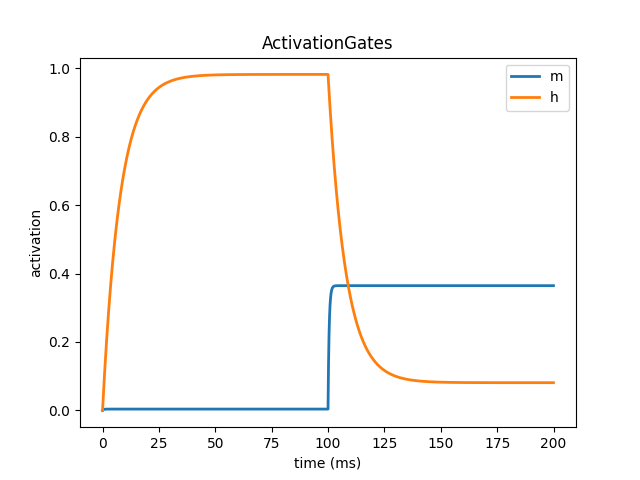

In [ ]:
# Initial Plot (change name!)
plotname="Activation"
plt.close(plotname)

# define a voltage range for calculating the function
V = -45
t, m, h = ActivationGates(V)

# make Figure
fig, ax = plt.subplots(num=plotname)
line1, = ax.plot(t, m, lw=2, label= 'm')
line2, = ax.plot(t, h, lw=2, label= 'h')
ax.set_xlabel('time (ms)')
ax.set_ylabel('activation')
ax.set_title('ActivationGates')
ax.legend()
plt.show()

In [ ]:
#@title Interactive
u_line1 = widgets.fixed(line1)
u_line2 = widgets.fixed(line2)
params = {
    "V": widgets.FloatSlider(min=-100, max=10, step=0.1, value=-45, continuous_update=False)
}
# Interactive
w = interactive(functionUpdate,
                line=u_line1,
                function=widgets.fixed(ActivationGates),
                i=widgets.fixed(1),
                **params
                )

v = interactive(functionUpdate,
                line=u_line2,
                function=widgets.fixed(ActivationGates),
                i=widgets.fixed(2),
                **params
                )

display(w)

interactive(children=(FloatSlider(value=-45.0, continuous_update=False, description='V', max=10.0, min=-100.0)…

#### Comprehension Questions:


Experiment with the slider above and reason about the following questions:

1. At the initial stage, why does h grow and m does not?
2. Why do m and h have opposite behaviors after the membrane potential step?
3. Which variable takes the longest to reach steady state?

## The Sodium Current


Now we have all the ingredients to understand how (1) gating variables, (2) conductance and (3) driving force becomes a **current**. We begin our exploration with the Sodium current.

For the Sodium current to flow into the cell, three factors must obtain:
1. There must be a driving force for the current to enter the cell $(V-E_{Na}) \neq 0$;
2. The Sodium channels must be open (m>0);
3. The Sodium innactivation gate must be letting ions through(h>0).

The current due to Sodium is then determined by the driving force for the ion, **times** the maximum conductance for the channel (representing the total number of available channels times the conductance of a single channel) **times** the proportion of channels open **times** how many channels are _not innactive_.

For Sodium, this is the equation that determines the current that flows in the cell:

------------

$I_{Na} = \bar{g}_{Na} m ^3 h (V-E_{Na})$

------------

Note the exponent at $m$. Its existence is related to the number of independent subunits that have to be open for the ion channel to let ion channels through.

### Simulating a Membrane with the Sodium Current

What would happen to the membrane potential if there were **only** Sodium channels in the membrane? Let us assume that, for the moment:
- No leak conductance.
- No other channels.


In [ ]:
def SodiumCurrent(E_Na, g_Na, Cm):
  start_scope()

  # Reversal Potentials
  E_Na = E_Na*mV

  # Conductances
  g_Na =  g_Na * mS / cm**2

  # Membrane Capacitance
  Cm = Cm * uF / cm**2

  # define our differential equations
  eqs_V ='''
  dv/dt = (I - I_Na)/Cm : volt
  '''

  eqs_I = '''
  I_Na = g_Na*(m*m*m)*h*(v-E_Na) : amp / meter ** 2
  I : amp / meter ** 2
  '''

  eqs_activation= '''
  m_inf =  1/(1+exp((-40*mV -v)/(9*mV))) : 1
  h_inf =  1/(1+exp((-68*mV -v)/(-7*mV))) : 1
  taum  =  .04*ms + .46*exp(-(-38*mV-v)**2/(30*mV)**2) *ms : second
  tauh  =  1.2*ms + 7.4*exp(-(-67*mV-v)**2/(20*mV)**2) *ms : second
  dm/dt = (m_inf - m)/taum : 1
  dh/dt = (h_inf - h)/tauh : 1
  '''

  eqs = eqs_V
  eqs += eqs_I
  eqs += eqs_activation

  G = NeuronGroup(1,eqs, method='euler', dt=0.001*ms)

  M = StateMonitor(G, ['v','m','h'], record=0)

  ## Run the simulation starting from a hyperpolarized membrane.
  G.v = -70 * mV
  # start with deinactivated (active) channels
  G.h = 1
  # run for 100ms
  run(100*ms)

  # briefly change the potential to a very hyperpolarized potential
  G.v = 60 * mV
  run(100*ms)

  return M.t/ms, M.v[0]/mV, M.h[0], M.m[0]

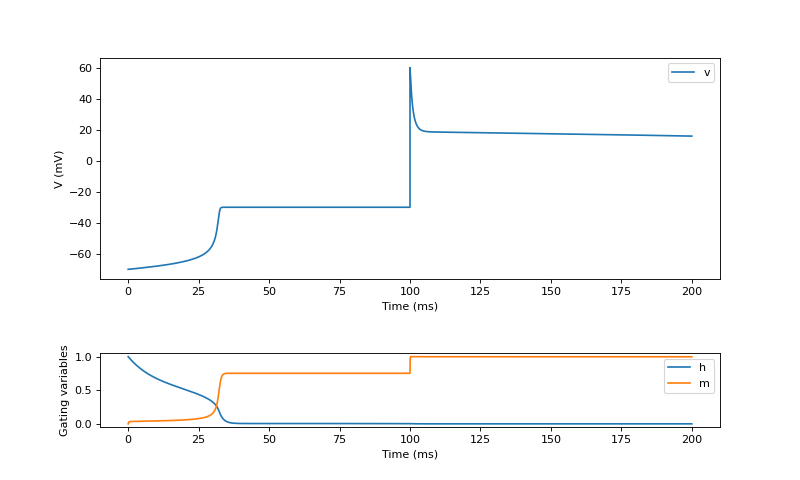

In [ ]:
# Initial Plot (change name!)
plotname="Sodium"
plt.close(plotname)

# define a voltage range for calculating the function
E_Na, g_Na, Cm = -30, 120, 1
t, v, h, m = SodiumCurrent(E_Na, g_Na, Cm)



# prepare a grid to plot graphs  (like function subplot in matlab)
grid = plt.GridSpec(3, 1, wspace=0.4, hspace=1)

# create figure
fig = plt.figure(num=plotname, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(grid[:2, 0])
ax2 = fig.add_subplot(grid[2, 0])

# in the first viewport plot membrane potential vs time
line1, = ax1.plot(t, v, label='v')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('V (mV)')
ax1.legend();

# plot the activation variables
ax2.plot(t, h, label='h')
ax2.plot(t, m, label='m')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Gating variables')
ax2.legend();

plt.show()

In [ ]:
#@title Interactive

# Widgets for interactive parameters
u_line1=widgets.fixed(line1)
u_line2=widgets.fixed(line2)
u_line3=widgets.fixed(line3)
function=widgets.fixed(SodiumCurrent)

# note: we have to use the FloatSlider widget for continuous variables, with continuous_update=False for improved performance

params = {
    "E_Na": widgets.FloatSlider(min=-50, max=-10, step=1, value=-30, continuous_update=False),
    "g_Na": widgets.FloatSlider(min=70, max=170, step=1, value=120, continuous_update=False),
    "Cm": widgets.FloatSlider(min=0.5, max=3, step=0.1, value=1, continuous_update=False)
}

# Interactive
iv = interactive(functionUpdate,
                line=u_line1,
                function=function,
                i=widgets.fixed(1),
                **params
                )

ih = interactive(functionUpdate,
                line=u_line2,
                function=function,
                i=widgets.fixed(2),
                **params
                )

im = interactive(functionUpdate,
                line=u_line3,
                function=function,
                i=widgets.fixed(3),
                **params
                )

# Displaying interactive (only once because shared params)
display(iv)

interactive(children=(FloatSlider(value=-30.0, continuous_update=False, description='E_Na', max=-10.0, min=-50…

#### Questions:
1. Describe what you see making reference to the code above.
2. What differences do you see between the orange and blue curves (bottom plot)? Why does the blue curve starts immediately to change over time while the orange curve only has a big change after some time? Why is the orange curve's change fast?
3. Why does the membrane potential (upper plot) rise fast at about 25-30ms? What happens at 100ms?
4. At the end of the experiment is the channel (dein)active or inactive? Which state variable represents that?
5. At the end of the experiment is the channel open or closed? Which state variable represents that?
6. Experiment with the voltage. What do you observe?


#### Answers:

1. We are measuring the value of the activation variables while we 'clamp' the voltage to different values.
2. The state of the gating variables is membrane potential dependent. When we raise the membrane potential, Sodium channels open (m tends to 1) and inactivate (h tends to 0). Activation and inactivation have different speeds.
3. A fast positive flick of the membrane potential (25ms)leads the channels to open (fast) and inactivate (more slowly). Another positive flick of the membrane potential brings it to the region of sodium regenerative activation, leading to a spike like response. Note that the membrane potential  settles on one of two possible potentials, either a depolarized one (first 100ms) or a hyperpolarized one (100-200ms).
4. Inactive, h = 0 .
5. Closed, m = 1.

## The Potassium Current


The potassium **current** can be expressed equivalently to the Sodium Current, by the following equation:

----

$$ I_k = \bar{g}_{K}n^4(V-E_K)$$

----

Where $(V-E_K)$ is the Potassium driving force (the momentary membrane potential minus the potassium reversal potential),  $\bar{g}_{K}$ is the maxiumum conductance of potassium ions. The $n$ is the activation variable. Just like $m$ and $h$ variables, the $n$ activation variable follows the same kind of dynamics as in Sodium, where $n$ tends to its **steady state**.

----
$$ \frac{dn}{dt} = \dot{n} = \frac{n_{\infty}(V) - n}{\tau_n}
$$

> Just like the other activation variables $n_{\infty}(V)$ has a sigmoidal shape and $\tau_n(V)$ has a gaussian shape.

---

We can now inspect the activation gates and add these equations to the model.


### Coding Exercise: All Activation Functions

Before we go into adding the Potassium (K) current to our membrane, it is illustrative to compare all the activation variables and their respective time constants. Using your sigmoid and tau functions above, plot all the activation variables alongside in the same panel. In another figure or panel do the same for the time constants.

| gating function | $V_{\frac{1}{2}}$ | k | time constant ($\tau_{gate}$) | $V_{max}$ | $\sigma$ | $C_{base}$ | $C_{amp}$ |
|-|-|-|-|-|-|-|-|
| $m_\infty(V)$ | -40 | 9 |$\tau_m(V)$|-38     |30| 0.04 |0.46|
| $h_\infty(V)$ | -62 | -7 |$\tau_h(V)$| -67   |20| 1.2  |7.4|
| $n_\infty(V)$ | -53 | 15 |$\tau_n(V)$|-79 |50|1.1  |4.7|


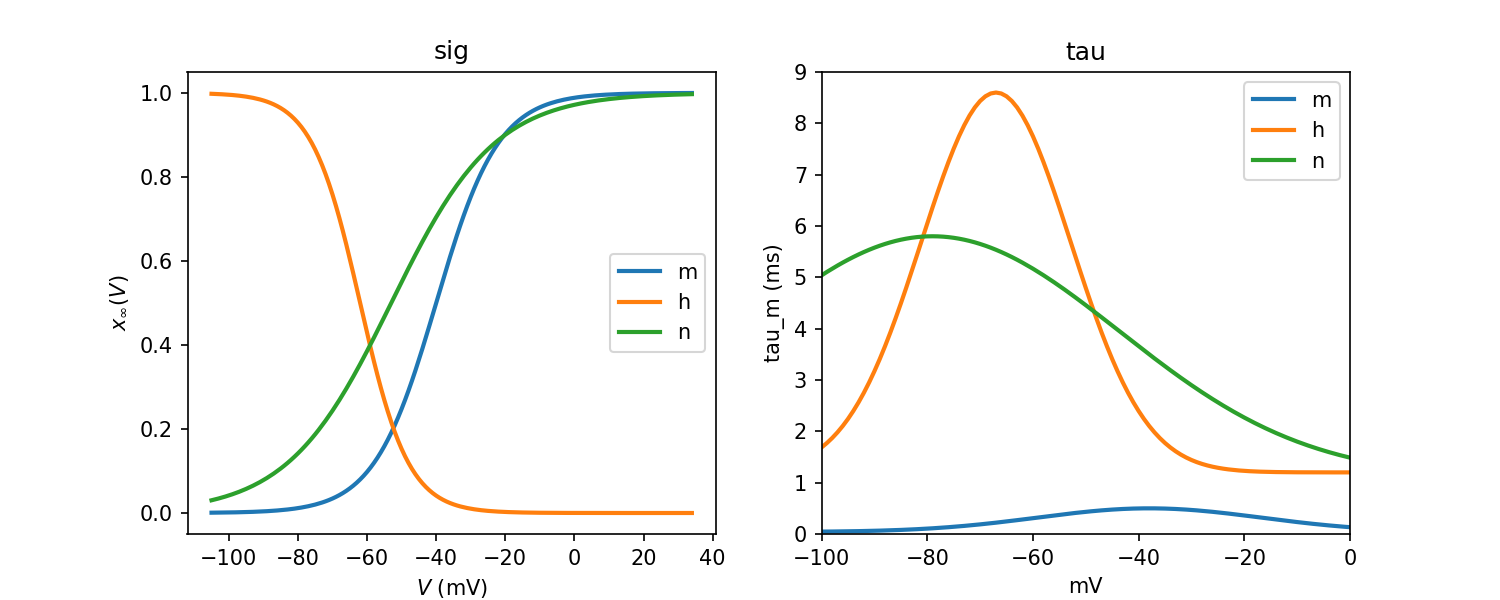

In [ ]:
# Initial Plot (change name!)
plotname="tau_sig2"
plt.close(plotname)

# define a voltage range for calculating the function
V_range = np.arange(-105.0, 35.0, 1.)

m_inf =  sigmoid(-40,  9, V_range)
h_inf =  sigmoid(-62, -7, V_range)
n_inf =  sigmoid(-53, 15, V_range)

tau_m = tau( 0.04, 0.46, -38, 30, V_range)
tau_h = tau( 1.2 , 7.4, -67, 20, V_range)
tau_n = tau( 1.1 , 4.7, -79, 50, V_range)

# make Figure
fig, (ax1, ax2) = plt.subplots(1, 2, num=plotname, figsize=(10, 4), dpi= 150)
line1, = ax1.plot(V_range, m_inf, lw=2, label= 'm')
line2, = ax1.plot(V_range, h_inf, lw=2, label= 'h')
line3, = ax1.plot(V_range, n_inf, lw=2, label= 'n')
ax1.set_xlabel('$V $ (mV)')
ax1.set_ylabel('$x_{\infty}(V)$')
ax1.set_title('sig')
ax1.legend()

line4, = ax2.plot(V_range, tau_m, lw=2, label= 'm')
line5, = ax2.plot(V_range, tau_h, lw=2, label= 'h')
line6, = ax2.plot(V_range, tau_n, lw=2, label= 'n')
ax2.set_xlabel('mV')
ax2.set_ylabel('tau_m (ms)')
ax2.set_title('tau')
ax2.set_xlim(-100.0, 0.0)
ax2.set_ylim(0, 9)
ax2.legend()
plt.show()

In [ ]:
#@title Interactive

# Widgets for interactive parameters
u_line1=widgets.fixed(line1)
u_line2=widgets.fixed(line2)
u_line3=widgets.fixed(line3)
function1=widgets.fixed(sigmoid)

u_line4=widgets.fixed(line4)
u_line5=widgets.fixed(line5)
u_line6=widgets.fixed(line6)
function2=widgets.fixed(tau)

# note: we have to use the FloatSlider widget for continuous variables, with continuous_update=False for improved performance

params_sig1 = {
    "v_at_half": widgets.FloatSlider(min=-100, max=0, step=1, value=-40, continuous_update=False),
    "k": widgets.FloatSlider(min=1, max=10, step=1, value=9, continuous_update=False),
    "V": widgets.fixed(V_range)
}

params_sig2 = {
    "v_at_half": widgets.FloatSlider(min=-100, max=0, step=1, value=-62, continuous_update=False),
    "k": widgets.FloatSlider(min=-10, max=-1, step=1, value=-7, continuous_update=False),
    "V": widgets.fixed(V_range)
}

params_sig3 = {
    "v_at_half": widgets.FloatSlider(min=-100, max=0, step=1, value=-53, continuous_update=False),
    "k": widgets.FloatSlider(min=10, max=20, step=1, value=15, continuous_update=False),
    "V": widgets.fixed(V_range)
}


params_tau1 = {
    "C_base": widgets.FloatSlider(min=0, max=1.6, step=0.01, value=0.04, continuous_update=False),
    "C_amp": widgets.FloatSlider(min=0, max=8, step=0.01, value=0.46, continuous_update=False),
    "V_max": widgets.FloatSlider(min=-100, max=0, step=1, value=-38, continuous_update=False),
    "sig": widgets.FloatSlider(min=0, max=100, step=1, value=30, continuous_update=False),
    "v": widgets.fixed(V_range)
}

params_tau2 = {
    "C_base": widgets.FloatSlider(min=0, max=1.6, step=0.01, value=1.1, continuous_update=False),
    "C_amp": widgets.FloatSlider(min=0, max=8, step=0.01, value=7.4, continuous_update=False),
    "V_max": widgets.FloatSlider(min=-100, max=0, step=1, value=-67, continuous_update=False),
    "sig": widgets.FloatSlider(min=0, max=100, step=1, value=20, continuous_update=False),
    "v": widgets.fixed(V_range)
}

params_tau3 = {
    "C_base": widgets.FloatSlider(min=0, max=1.6, step=0.01, value=1.2, continuous_update=False),
    "C_amp": widgets.FloatSlider(min=0, max=8, step=0.01, value=4.7, continuous_update=False),
    "V_max": widgets.FloatSlider(min=-100, max=0, step=1, value=-79, continuous_update=False),
    "sig": widgets.FloatSlider(min=0, max=100, step=1, value=50, continuous_update=False),
    "v": widgets.fixed(V_range)
}

# Interactive
sig1 = interactive(functionUpdate,
                line=u_line1,
                function=function1,
                **params_sig1
                )

sig2 = interactive(functionUpdate,
                line=u_line2,
                function=function1,
                **params_sig2
                )

sig3 = interactive(functionUpdate,
                line=u_line3,
                function=function1,
                **params_sig3
                )

tau1 = interactive(functionUpdate,
                line=u_line4,
                function=function2,
                **params_tau1
                )

tau2 = interactive(functionUpdate,
                line=u_line5,
                function=function2,
                **params_tau2
                )
tau3 = interactive(functionUpdate,
                line=u_line6,
                function=function2,
                **params_tau3
                )

# Creating labels for each group
sig_label = Label("Sigmoid Group")
tau_label = Label("Tau Group")

# Grouping the widgets with labels
sig_group = VBox([sig_label, sig1, sig2, sig3])
tau_group = VBox([tau_label, HBox([tau1, tau2, tau3])])

# Grouping the labeled groups side by side
sig_tau_group = HBox([sig_group, tau_group])

# Displaying the groups
display(sig_tau_group)

# 3. The Hodgkin Huxley Model


### The Hodgkin Huxley Model

Embodying the facts above is the **Hodgkin Huxley model** —a **single compartment model** of the giant squid axon — where the **action potential** (or spike) is a due to **voltage mediated** **interactions between multiple ion channels** which can lead current out or in the cell, that is, had time and voltage dependence, i.e., **active conductances**.

The  **HH is a four-dimensional model** where the momentary membrane potential ($V_m$) depends on the **state variables** (m, h, n) describing the different states of the ion channels (e.g., activation and inactivation variables). The evolution of the state variables are represented by differential equations.

Here we summarize the mechanisms in sections 1 and 2 above. According to the Kirchhoff’s law, the total electrical current $I$ flowing across the membrane may be divided into the capacitive current $I_C$, plus all the ionic currents. We considered three types of ion channels in this model: the sodium channel ($I_{Na}$), the potassium channel ($I_{K}$), and unspecified passive leakage  ($I_{L}$), including Chloride channels and other anions.

We arrive at the final equation defining the model (also called the 'master equation'):

----

$$
I = I_C + I_{Na}+ I_K + I_{leak}
$$


with

$$
I_C = C_m \dot{V}
$$

and where $C_m$ is the membrane capacitance and $\dot{V}$ is the change of voltage across the membrane as a function of time. Therefore, we can express the change of voltage accross the membrane as:

----

$$
C_m \dot{V} = I - I_{Na}- I_K - I_{leak}
$$

or more explicitly:

$$
  \dot{V} = \frac{I - \bar{g}_{Na} m^3 h (V -E_{Na}) - \bar{g}_{K} n^4 (V - E_k) - g_{leak} (V - E_{leak})} {C_m}
$$

----

Where we also compute $\dot{m}$, $\dot{n}$ and $\dot{h}$ via all the auxiliary equations for $\tau$ and the steady states.

## Coding Exercise: Complete The Hodgkin Huxley Model

Now put all the pieces together:

1. The passive components of the membrane (capacitance and leak)
2. The Sodium current (conductance, activations, driving force)
3. The Potassium current (conductance, activations, driving force)


Below we give you the equations for the dynamics of the potassium current.  

----
> $$ I_k = \bar{g}_K n^4 (V - E_k)$$
> $$ \frac{dn}{dt} = \dot{n} = \frac{n_{\infty}(V) - n}{\tau_n} $$
> $$\tau_n(V) = 1.1 + 4.7  e^\frac{-(-79mV-V)}{(50mV)^2}$$
> $$ n_\infty(V) = \frac{1}{1+e^{(-53mV-V)/15mV}} $$

with

> $$ \bar{g}_K = 36 \mu /cm^2 S$$
> $$ E_K = -77 mV$$

----



In [ ]:
def Hodgkin_Huxley(E_leak, E_Na, E_K, g_leak, g_Na, g_K, Cm):
    start_scope()

    # Reversal Potentials
    E_leak =  E_leak * mV
    E_Na   =  E_Na   * mV
    E_K    =  E_K   * mV

    # Conductances
    ## attention to UNITS! For instance uS << mS
    g_leak =  g_leak * uS / cm ** 2
    g_Na   =  g_Na * mS / cm ** 2
    g_K    =  g_K * mS / cm ** 2

    # Membrane Capacitance
    Cm     =  Cm * uF / cm ** 2

    # here we define our master differential equation. Note that I_k is already here.
    eqs_V ='''
    dv/dt = (I -I_leak - I_Na - I_K )/Cm : volt
    '''


    # here we add a definition for the potassium current I_K
    eqs_I = '''
    I_leak = g_leak * (v - E_leak)   : amp / meter ** 2
    I_Na = g_Na*(m*m*m)*h*(v - E_Na) : amp / meter ** 2
    I_K = g_K*(n*n*n*n)*(v - E_K)    : amp / meter ** 2
    I                                : amp / meter ** 2
    '''


    # here you add the equations defining the potassium activation gates
    eqs_activation= '''
    n_inf =  1/(1+exp((-53*mV -v)/(15*mV))) : 1
    m_inf =  1/(1+exp((-40*mV -v)/(9*mV)))  : 1
    h_inf =  1/(1+exp((-62*mV -v)/(-7*mV))) : 1
    taum  =  .04*ms + .46*exp(-(-38*mV-v)**2/(30*mV)**2) *ms : second
    tauh  =  1.2*ms + 7.4*exp(-(-67*mV-v)**2/(20*mV)**2) *ms : second
    taun  =  1.1*ms + 4.7*exp(-(-79*mV-v)**2/(50*mV)**2) *ms : second
    dm/dt = (m_inf - m)/taum : 1
    dh/dt = (h_inf - h)/tauh : 1
    dn/dt = (n_inf - n)/taun : 1
    '''


    # notice that we simply "concatenate" the strings with all equations
    # ( with the operator+=).
    eqs = eqs_V
    eqs += eqs_I
    eqs += eqs_activation

    G = NeuronGroup(1,eqs, 'euler', dt=0.025*ms)

    M = StateMonitor(G, ['v','m','h','n', 'I'], record=0)

    ########################## Initialize Variables at Resting State

    ## Run an experiment

    # resting
    G.I = 0 * uA * cm ** -2
    run(50*ms)

    # hyperpolarizing injection
    G.I = 25. * uA * cm ** -2
    run( .5 *ms)

    # relaxing
    G.I = 0 * uA * cm ** -2
    run(200*ms)

    return M.t/ms, M.v[0]/mV, M.m[0], M.h[0], M.n[0], M.I[0]



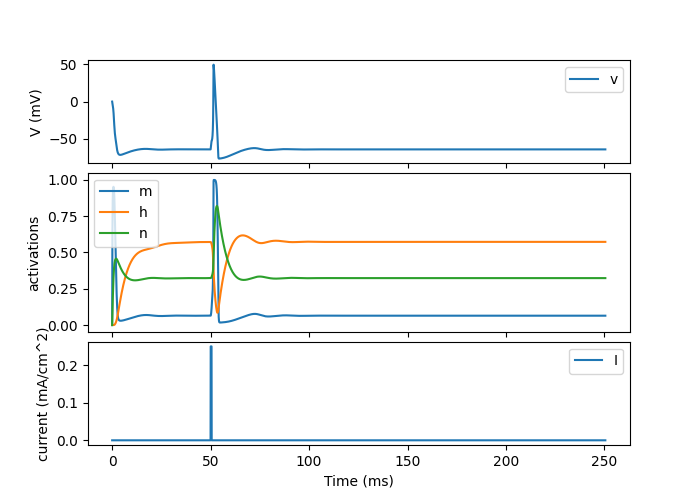

In [ ]:
# Initial Plot (change name!)
plotname="Hodgkin Huxley"
plt.close(plotname)

# define a voltage range for calculating the function
E_leak, E_Na, E_K = -54.4, 55, -77
g_leak, g_Na, g_K = 300, 120.0, 36.0
Cm = 1

t, v, m, h, n, I = Hodgkin_Huxley(E_leak, E_Na, E_K, g_leak, g_Na, g_K, Cm)



# prepare a grid to plot graphs  (like function subplot in matlab)
grid = plt.GridSpec(7, 1, wspace=0.4, hspace=0.2)

# create figure
fig = plt.figure(num=plotname, figsize=(7, 5), dpi=100, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(grid[0:2, 0])
ax2 = fig.add_subplot(grid[2:5, 0])
ax3 = fig.add_subplot(grid[5:7, 0])

# in the first viewport plot membrane potential vs time
line1, = ax1.plot(t, v, label='v')
ax1.set_ylabel('V (mV)')
ax1.legend();

# plot the activation variables
line2, = ax2.plot(t, m, label='m')
line3, = ax2.plot(t, h, label='h')
line4, = ax2.plot(t, n, label='n')
ax2.set_ylabel('activations')
ax2.legend();

line5, = ax3.plot(t, I, label='I')
ax3.set_xlabel('Time (ms)')
ax3.set_ylabel('current (mA/cm^2)')
ax3.legend();

plt.show()

In [ ]:
#@title Interactive

# Widgets for interactive parameters
u_line1=widgets.fixed(line1)
u_line2=widgets.fixed(line2)
u_line3=widgets.fixed(line3)
u_line4=widgets.fixed(line4)
u_line5=widgets.fixed(line5)
function=widgets.fixed(Hodgkin_Huxley)

# note: we have to use the FloatSlider widget for continuous variables, with continuous_update=False for improved performance

params = {
    "E_leak": widgets.FloatSlider(min=-75, max=-30, step=0.1, value=-54.4, continuous_update=False),
    "E_Na": widgets.FloatSlider(min=30, max=75, step=1, value=55, continuous_update=False),
    "E_K": widgets.FloatSlider(min=-100, max=-50, step=1, value=-77, continuous_update=False),
    "g_leak": widgets.FloatSlider(min=200, max=400, step=1, value=300, continuous_update=False),
    "g_Na": widgets.FloatSlider(min=70, max=170, step=0.1, value=120, continuous_update=False),
    "g_K": widgets.FloatSlider(min=25, max=50, step=0.1, value=36, continuous_update=False),
    "Cm": widgets.FloatSlider(min=0.5, max=3, step=0.1, value=1, continuous_update=False)
}
# Interactive
i_v = interactive(functionUpdate,
                line=u_line1,
                function=function,
                i=widgets.fixed(1),
                **params
                )

i_m = interactive(functionUpdate,
                line=u_line2,
                function=function,
                i=widgets.fixed(2),
                **params
                )

i_h = interactive(functionUpdate,
                line=u_line3,
                function=function,
                i=widgets.fixed(3),
                **params
                )
i_n = interactive(functionUpdate,
                line=u_line4,
                function=function,
                i=widgets.fixed(4),
                **params
                )
i_I = interactive(functionUpdate,
                line=u_line5,
                function=function,
                i=widgets.fixed(5),
                **params
                )

# Displaying interactive (only once because shared params)
display(i_v)

interactive(children=(FloatSlider(value=-54.4, continuous_update=False, description='E_leak', max=-30.0, min=-…

### Questions:
1. What do we observe in the initial 10ms of the simulation? Why?
2. What happens at 50ms?


#### Answers:

1.  When the model is initialized, the activation variables are not in equilibrium, and they will tend to produce dynamics and oscillations until they relax into an equilibrium state. This is because we must select the initial value of the state variables (V,m,n,h)
2. An action potential! All about it in the continuation of this project.

## Summary:

After installing sodium and potassium channels we effectively assembled the entire Hodgkin Huxley model of the action potential. These are the principal mechanisms in operation:

- Sodium channel induces depolarization via positive feedback (m grows with V)
- Leak brings the cell back to its resting potential (V-Vrest)
- Positive membrane potential induces the inactivation of Sodium (h tends to 0)
- Potassium induces hyperpolarization after the spike (n tends to 1)

These are tempered by the capacitance, which defines how fast the ionic mechanisms contribute to the effective membrane potential.



# To Be Continued ...

[In Part II of this notebook](https://colab.research.google.com/drive/15W961ErD0v6PIwA0raaz-uTtAGLh6-Md?usp=sharing), we will discuss in more detail how the gating variables interact at the level of the membrane to produce spiking.

# Review Questions

## Passive Membrane Properties
- What is 'ion channel permeability'?
- How is capacitance like friction?
- How is the driving force like a spring?
- Explain conductance in your own words and why it is different for different ion types.

## Active Channels and Gating variables
- What are gating variables? What gating variables exist in the typical sodium channel?
- When is h at its maximum, at small or large voltages?
- When is m at its maximum, at small or large voltages?
- Does the potassium channel inactivate?
- What is a common value of the resting membrane potential?
- What are the ions with high concentration in the neuron?
- What is the unit of g * V_rest?
- [To dive deeper, take this online quiz](https://www.physiologyweb.com/daily_quiz/physiology_quiz_QBTakR5k4CTyBTLXoKGaSzdZ1bz2N7cq_neuronal_action_potential.html
)


# Primary Reference

Izhikevich, Dynamical Systems in Neuroscience, Section 2.3.1


# Online Resources

**MIT Courseware**
[Neurons as electrical circuits](https://www.youtube.com/watch?v=3GC721pNRLE&list=PLB4xSXXSguaFEi9_rweNu27YIhPiWOKCU&index=25&t=2619s)

**Physiology Web Resources**
- [Resting membrane potential](https://www.physiologyweb.com/lecture_notes/resting_membrane_potential/resting_membrane_potential.html)
- [Action Potential](https://www.physiologyweb.com/lecture_notes/neuronal_action_potential/neuronal_action_potential.html)
- [Bilipid Layer Permeability](https://www.physiologyweb.com/lecture_notes/biological_membranes/lipid_bilayer_permeability.html)
- [Derivation of the Nernst Equation](https://www.physiologyweb.com/lecture_notes/resting_membrane_potential/derivation_of_the_nernst_equation.html)

**Nernst Membrane Potential Simulator**
[Nernst Simulator + Resting Membrane Potential](https://www.azps.life/s/ngswin.zip) and believe it or not, [there is also an iOS app for that](https://apps.apple.com/us/app/nernst-goldman-equation-simulator/id1022504095) and the standalone flash version also available [here](https://www.azps.life/home/2016/4/28/teaching-spotlight-nernstgoldman-simulator)



#License

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

Mario Negrello, Daphne Cornelise, Elias Santoro. Reviewing and testing Su Saka and Natia Shamuja and many students. Figure sources: Geometry of Bursting, Eugene Izhikevich (2007). Saltatory conductance gif by By Dr. Jana - http://docjana.com/saltatory-conduction/
